<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-2/blob/main/Simulaci%C3%B3n_6_Control_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriz de Controlabilidad

In [57]:
import numpy as np
# Definir las matrices del sistema en espacio de estados
A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-0.6, -1.3, -0.8]])

B = np.array([[0],
              [0],
              [1]])

# Construcción de la matriz de controlabilidad C = [B, AB, A^2B]
AB = np.dot(A, B)
A2B = np.dot(A, AB)
C_matrix = np.hstack([B, AB, A2B])  # Concatenar las columnas

# Calcular el rango de la matriz de controlabilidad
rango_C = np.linalg.matrix_rank(C_matrix)

# Resultados
C_matrix, rango_C
# Calcular el rango de la matriz de controlabilidad
rango_C = np.linalg.matrix_rank(C_matrix)

# Resultados
C_matrix, rango_C


(array([[ 0.  ,  0.  ,  1.  ],
        [ 0.  ,  1.  , -0.8 ],
        [ 1.  , -0.8 , -0.66]]),
 3)

In [58]:
!pip install control  # instala  el módulo de control

In [59]:
import control as ctrl
import numpy as np


# Definir las matrices del sistema en espacio de estados
A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-0.6, -1.3, -0.8]])

B = np.array([[0],
              [0],
              [1]])

# Calcular la matriz de controlabilidad
Wc = ctrl.ctrb(A, B)
# Imprimir la matriz de controlabilidad
print(Wc)


[[ 0.    0.    1.  ]
 [ 0.    1.   -0.8 ]
 [ 1.   -0.8  -0.66]]


In [60]:
# Calcular el rango de la matriz de controlabilidad
rango_C = np.linalg.matrix_rank(C_matrix)
# Resultados
rango_C

3

Matriz de observabilidad

In [61]:
# Definir la matriz de observabilidad
C = np.array([[0.2, 0.4, 1]])  # Matriz de salida

# Construcción de la matriz de observabilidad O = [C; CA; CA^2]
CA = np.dot(C, A)
CA2 = np.dot(CA, A)
O_matrix = np.vstack([C, CA, CA2])  # Apilar las filas

# Calcular el rango de la matriz de observabilidad
rango_O = np.linalg.matrix_rank(O_matrix)

# Resultados
O_matrix, rango_O



(array([[ 0.2 ,  0.4 ,  1.  ],
        [-0.6 , -1.1 , -0.4 ],
        [ 0.24, -0.08, -0.78]]),
 3)

 #vector de realimentacion K para que el sistema en lazo cerrado tenga todos los polos en s = −2.

Vector de realimentación K: [[ 7.39773934 10.69773934  5.19943484]]


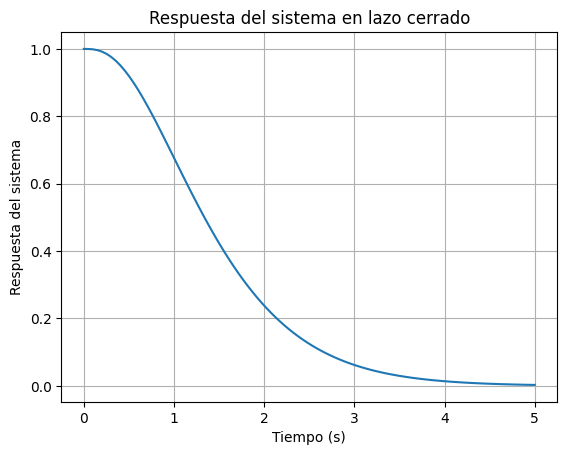

In [62]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Definir la matriz A y el vector B del sistema
A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-0.6, -1.3, -0.8]])
B = np.array([[0], [0], [1]])

# Polos deseados (ajustados para evitar repetición excesiva)
p_deseados = [-2, -2.00001, -2.000001]

# Cálculo del vector de realimentación K
K = ctrl.place(A, B, p_deseados)

print("Vector de realimentación K:", K)

# Simulación del sistema en lazo cerrado
A_cl = A - B @ K  # Nueva matriz de estado
C = np.array([[1, 0, 0]])  # Medimos la primera variable de estado
D = np.array([[0]])

sys_cl = ctrl.ss(A_cl, B, C, D)  # Sistema en espacio de estados

time = np.linspace(0, 5, 100)  # Tiempo de simulación
x0 = np.array([1, 0, 0])  # Condiciones iniciales
t_out, y_out, _ = ctrl.forced_response(sys_cl, T=time, X0=x0, return_x=True)

# Graficar la respuesta
plt.plot(t_out, y_out)
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta del sistema')
plt.title('Respuesta del sistema en lazo cerrado')
plt.grid()
plt.show()

Vector de realimentación K: [[-0.6      -1.3      -0.800011]]


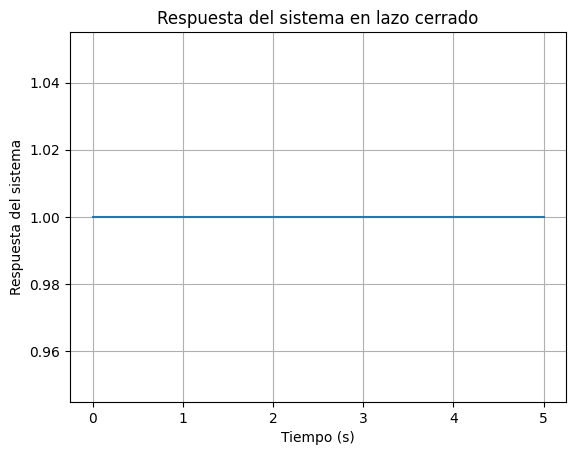

In [63]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Definir la matriz A y el vector B del sistema
A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-0.6, -1.3, -0.8]])
B = np.array([[0], [0], [1]])

# Polos deseados (ajustados para evitar repetición excesiva)
p_deseados = [0, 0.00001, 0.000001]

# Cálculo del vector de realimentación K
K = ctrl.place(A, B, p_deseados)

print("Vector de realimentación K:", K)

# Simulación del sistema en lazo cerrado
A_cl = A - B @ K  # Nueva matriz de estado
C = np.array([[1, 0, 0]])  # Medimos la primera variable de estado
D = np.array([[0]])

sys_cl = ctrl.ss(A_cl, B, C, D)  # Sistema en espacio de estados

time = np.linspace(0, 5, 100)  # Tiempo de simulación
x0 = np.array([1, 0, 0])  # Condiciones iniciales

#The line below has been modified to include return_x=True
t_out, y_out, _ = ctrl.forced_response(sys_cl, T=time, X0=x0, return_x=True)

# Graficar la respuesta
plt.plot(t_out, y_out)
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta del sistema')
plt.title('Respuesta del sistema en lazo cerrado')
plt.grid()
plt.show()

Respuesta en el tiempo de las variables de
estado del sistema

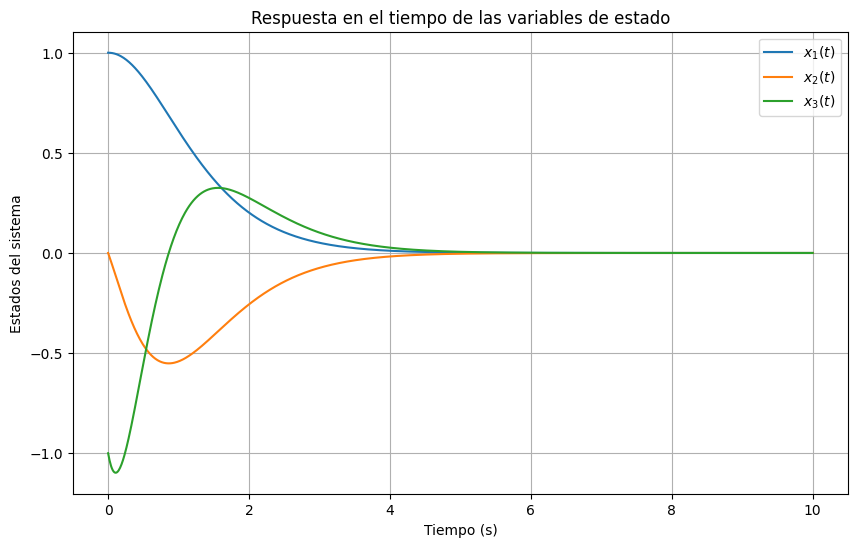

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, lsim

# Definir la matriz de estado del sistema original
A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-0.6, -1.3, -0.8]])
B = np.array([[0], [0], [1]])
C = np.eye(3)  # Para observar todas las variables de estado
D = np.zeros((3, 1))

# Vector de realimentación K calculado
K = np.array([[7.4, 10.7, 5.2]])

# Nueva matriz de estado en lazo cerrado
A_cl = A - B @ K

# Definir sistema en espacio de estados
sys_cl = StateSpace(A_cl, B, C, D)

# Definir tiempo de simulación y condiciones iniciales
t = np.linspace(0, 10, 1000)  # 10 segundos
x0 = np.array([1, 0, -1])  # Condiciones iniciales arbitrarias

# Simular respuesta
_, y, _ = lsim(sys_cl, U=np.zeros_like(t), T=t, X0=x0)

# Graficar la respuesta en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(t, y[:, 0], label="$x_1(t)$")
plt.plot(t, y[:, 1], label="$x_2(t)$")
plt.plot(t, y[:, 2], label="$x_3(t)$")
plt.xlabel("Tiempo (s)")
plt.ylabel("Estados del sistema")
plt.title("Respuesta en el tiempo de las variables de estado")
plt.legend()
plt.grid()
plt.show()

Matriz de Controlabilidad

In [65]:
import numpy as np
# Definir las matrices del sistema en espacio de estados
A = np.array([[0, 1],
              [-0.3188, -1.143]])

B = np.array([[0],
              [0.3188]])

# Construcción de la matriz de controlabilidad C = [B, AB, A^2B]
AB = np.dot(A, B)
A2B = np.dot(A, AB)
C_matrix = np.hstack([B, AB, A2B])  # Concatenar las columnas

# Calcular el rango de la matriz de controlabilidad
rango_C = np.linalg.matrix_rank(C_matrix)

# Resultados
C_matrix, rango_C
# Calcular el rango de la matriz de controlabilidad
rango_C = np.linalg.matrix_rank(C_matrix)

# Resultados
C_matrix, rango_C

(array([[ 0.       ,  0.3188   , -0.3643884],
        [ 0.3188   , -0.3643884,  0.3148625]]),
 2)

Matriz de observabilidad

In [66]:
# Definir la matriz de observabilidad
C = np.array([[1,0]])  # Matriz de salida

# Construcción de la matriz de observabilidad O = [C; CA; CA^2]
CA = np.dot(C, A)
CA2 = np.dot(CA, A)
O_matrix = np.vstack([C, CA, CA2])  # Apilar las filas

# Calcular el rango de la matriz de observabilidad
rango_O = np.linalg.matrix_rank(O_matrix)

# Resultados
O_matrix, rango_O


(array([[ 1.    ,  0.    ],
        [ 0.    ,  1.    ],
        [-0.3188, -1.143 ]]),
 2)

 #vector de realimentacion K para que el sistema en lazo cerrado tenga todos los polos en s = −1.

Vector de realimentación K: [[2.13679423 2.68823714]]


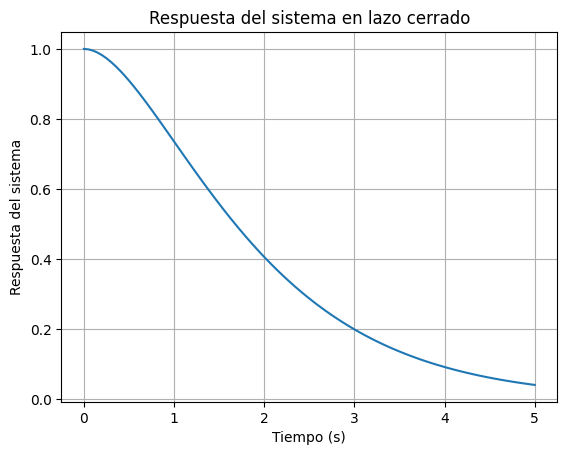

In [67]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Definir la matriz A y el vector B del sistema
A = np.array([[0, 1],
              [-0.3188, -1.143]])

B = np.array([[0],
              [0.3188]])

# Polos deseados (ajustados para evitar repetición excesiva)
p_deseados = [-1, -1.00001]

# Cálculo del vector de realimentación K
K = ctrl.place(A, B, p_deseados)

print("Vector de realimentación K:", K)

# Simulación del sistema en lazo cerrado
A_cl = A - B @ K  # Nueva matriz de estado
C = np.array([[1, 0]])  # Medimos la primera variable de estado
D = np.array([[0]])

# Include the D matrix in the ctrl.ss function call.
sys_cl = ctrl.ss(A_cl, B, C, D)  # Sistema en espacio de estados

time = np.linspace(0, 5, 100)  # Tiempo de simulación
x0 = np.array([1, 0])  # Condiciones iniciales
t_out, y_out, _ = ctrl.forced_response(sys_cl, T=time, X0=x0, return_x=True)

# Graficar la respuesta
plt.plot(t_out, y_out)
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta del sistema')
plt.title('Respuesta del sistema en lazo cerrado')
plt.grid()
plt.show()

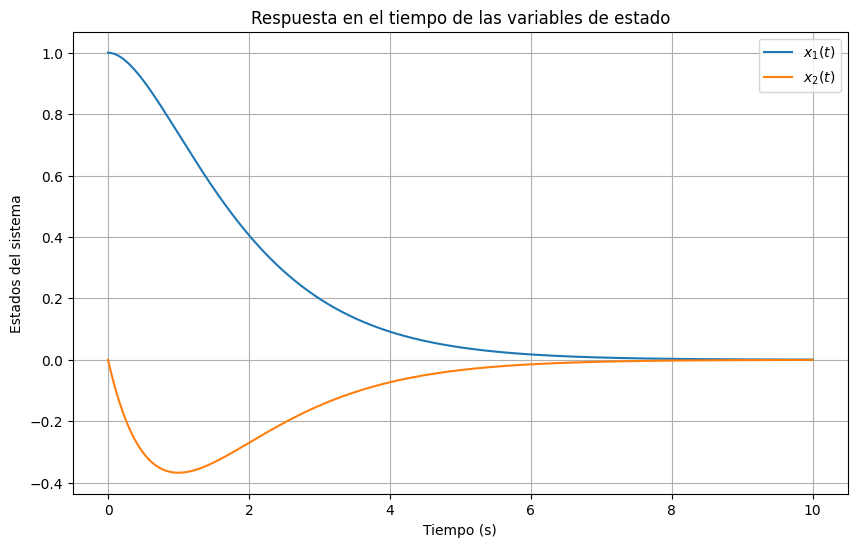

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, lsim

# Definir la matriz de estado del sistema original
A = np.array([[0, 1],
              [-0.3188, -1.143]])
B = np.array([[0],
              [0.3188]])

C = np.eye(2)
D = np.zeros((2, 1))

# Vector de realimentación K calculado
K = np.array([[2.13679423, 2.68823714]])

# Nueva matriz de estado en lazo cerrado
A_cl = A - B @ K

# Definir sistema en espacio de estados
sys_cl = StateSpace(A_cl, B, C, D)

# Definir tiempo de simulación y condiciones iniciales
t = np.linspace(0, 10, 1000)  # 10 segundos
# x0 should have the same dimension as the number of states (2 in this case).
x0 = np.array([1, 0])  # Adjusted initial conditions to match the number of states

# Simular respuesta
_, y, _ = lsim(sys_cl, U=np.zeros_like(t), T=t, X0=x0)

# Graficar la respuesta en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(t, y[:, 0], label="$x_1(t)$")
plt.plot(t, y[:, 1], label="$x_2(t)$")
# Removed the plot for x_3(t) since there are only 2 states
plt.xlabel("Tiempo (s)")
plt.ylabel("Estados del sistema")
plt.title("Respuesta en el tiempo de las variables de estado")
plt.legend()
plt.grid()
plt.show()